### Import


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


### Question 1-1


P_T -->  1.9952623149688795
G_T --> 25.118864315095795


<ipython-input-6-06b39ffa2a33>:24: RuntimeWarning: divide by zero encountered in true_divide
  return (((h_t+h_building)*(h_r))**2)/(d**4)


Text(0, 0.5, 'Received Power(dB)')

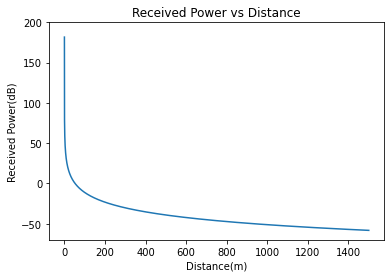

In [6]:

h_t,h_r,h_building = 1.5, 1.5,50 #in meters
#h_t: height of transmitter, h_r: height of receiver, h_building = height of building
G_T_dB, G_R_dB, P_T_dBm = 14, 14, 33 #dB, dB, dBm
#G_T_dB: Gain of transmitter, G_R_dB: Gain of receiver, P_T_dBm: Power of base station
def gain_to_dB(gain):
  return 10*(np.log10(gain))

def power_to_dB(power):
  return 10*(np.log10(power))

def dB_to_gain(dB):
  return np.power(10,dB/10)

def dBm_to_power(dBm):
  return np.power(10,((dBm-30)/10))

G_T = dB_to_gain(G_T_dB)
G_R = dB_to_gain(G_R_dB)
P_T = dBm_to_power(P_T_dBm)
print("P_T --> ",P_T)
print("G_T -->", G_T)

def calc_path_loss(d):
  return (((h_t+h_building)*(h_r))**2)/(d**4)

def calc_Pr(d,alpha =1, x = 0):
  g = calc_path_loss(d)
  const = G_T*G_R*P_T * alpha * np.power(10,(x/10))
  receiving_power = g*const
  return receiving_power
#receiving_power_dB = 10*(np.log10(receiving_power)) 
#print('const', const)

d = np.linspace(0, 1500, 1000000)
#print(d)
#print('P_R_dB', P_R_dB)
P_R = calc_Pr(d)
P_R_dB = power_to_dB(P_R)
plt.ylim([-70, 200])
plt.plot(d, P_R_dB)
plt.title('Received Power vs Distance')
plt.xlabel('Distance(m)')
plt.ylabel('Received Power(dB)')

### Question 1-2

<ipython-input-2-8b71fe8f16ea>:23: RuntimeWarning: divide by zero encountered in true_divide
  return (((h_t+h_building)*(h_r))**2)/(d**4)


(60.0, 320.0)

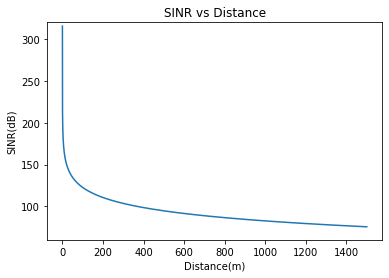

In [ ]:
#SINR = Signal Power/(Interference Power + Noise Power)
#Signal Power is P_R
k, T, B=1.38*(10**(-23)), 300.15, 10*(10**6)
N = k*T*B

def calc_SNR1(d):
  I = 0
  P_R = calc_Pr(d)
  Sig_Noi_Ratio = P_R/(N)
  #Sig_Noi_Ratio_dB = 10*(np.log10(Sig_Noi_Ratio))
  return Sig_Noi_Ratio

d = np.linspace(0, 1500, 1000000)
SNR = calc_SNR1(d)
SNR_dB = power_to_dB(SNR)
plt.plot(d, SNR_dB)

plt.title('SINR vs Distance')
plt.xlabel('Distance(m)')
plt.ylabel('SINR(dB)')
plt.ylim([60, 320])


###Question 2-1

shadowing [ 2.21777691 15.34053491  1.89370665 ...  6.2484641  16.96364395
  2.77663039]
[0.00000000e+00 1.50015002e-01 3.00030003e-01 ... 1.49969997e+03
 1.49984998e+03 1.50000000e+03]


<ipython-input-2-8b71fe8f16ea>:23: RuntimeWarning: divide by zero encountered in true_divide
  return (((h_t+h_building)*(h_r))**2)/(d**4)


Text(0, 0.5, 'Received Power(dB)')

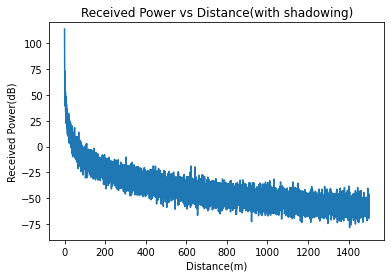

In [ ]:
#both path loss and shadowing
#log-normal shadowing

sigma = 6
d = np.linspace(0, 1500, 10000)
shadowing = 10**(np.random.normal(0, sigma, 10000)/10)
print("shadowing", shadowing)

print(d)
#pdf = (np.exp(-(np.log(d) - mu)**2 / (2 * sigma**2))/(d * sigma * np.sqrt(2 * np.pi)))
P_R_sd = calc_Pr(d)*shadowing
P_R_sd_dB = power_to_dB(P_R_sd)
#print(d)
#print('P_R_dB', P_R_dB)

#plt.plot(d, P_R_sd)
#plt.plot(d, pdf)

plt.ylim([-90, 120])
plt.plot(d, P_R_sd_dB)
plt.title('Received Power vs Distance(with shadowing)')
plt.xlabel('Distance(m)')
plt.ylabel('Received Power(dB)')

###Question 2-2

(0.0, 310.0)

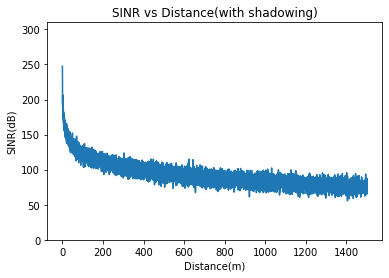

In [ ]:
def calc_SNR2(d):
  I = 0
  Sig_Noi_Ratio = P_R_sd/(N)
  #Sig_Noi_Ratio_dB = 10*(np.log10(Sig_Noi_Ratio))
  return Sig_Noi_Ratio

d = np.linspace(0, 1500, 10000)
SNR = calc_SNR2(d)
SNR_dB = power_to_dB(SNR)
plt.plot(d, SNR_dB)

plt.title('SINR vs Distance(with shadowing)')
plt.xlabel('Distance(m)')
plt.ylabel('SINR(dB)')
plt.ylim([0, 310])